In [9]:
from qiskit import *

In [10]:
#We're now building a 2 Qbit quanttum circuit

qr = QuantumRegister(2)

In [11]:
#Now build a 2 classical bit, Classical Register
cr = ClassicalRegister(2)

In [12]:
circuit = QuantumCircuit(qr, cr)

In [13]:
%matplotlib inline

In [14]:
circuit.draw()

In [15]:
#First step to entanglement is to create a hadamard gate onto the first Qbit
circuit.h(qr[0])

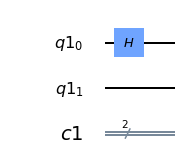

In [16]:
circuit.draw(output = "mpl")

In [17]:
#Now let's perform a 2 Qbit operation called the controlled X
circuit.cx(qr[0], qr[1])

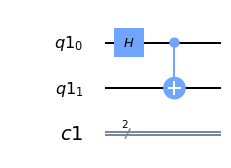

In [18]:
circuit.draw(output = "mpl")

Now we have to measure the Qbits,take those measurements and store them into the classical bits.

In [19]:
circuit.measure(qr, cr)

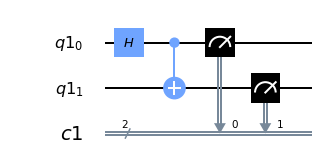

In [20]:
circuit.draw(output = "mpl")

Now we have to run the circuit. Before we run it on a Quantum computer,we have to run it
on a simulator to see how it behaves.

In [21]:
simulator = Aer.get_backend("qasm_simulator")

In [22]:
result = execute(circuit, backend = simulator).result()

In [23]:
from qiskit.tools.visualization import plot_histogram

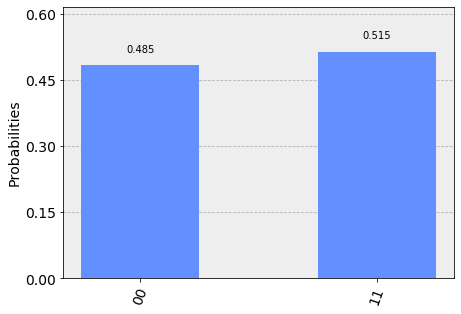

In [24]:
plot_histogram(result.get_counts(circuit))

Now let's run out circuit on a quantum computer at IBM

In [25]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [26]:
provider = IBMQ.get_provider("ibm-q")

In [27]:
qcomp = provider.get_backend("ibmq_16_melbourne")

In [28]:
job = execute(circuit, backend=qcomp)

In [29]:
from qiskit.tools.monitor import job_monitor

In [30]:
job_monitor(job)

Job Status: job has successfully run


In [31]:
result = job.result()

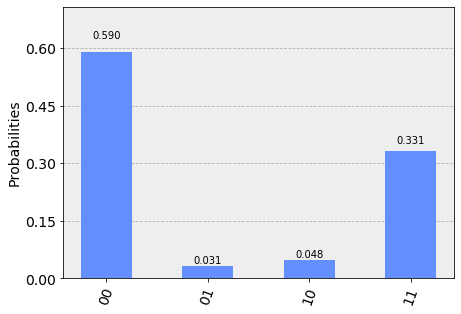

In [32]:
plot_histogram(result.get_counts(circuit))